# Time resolved reduction

In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~/git/LiquidsReflectometer/reduction'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

In [5]:
import importlib

from lr_reduction import event_reduction, output, reduction_template_reader, template, workflow

In [3]:
import mantid
import mantid.simpleapi as api

mantid.kernel.config.setLogLevel(3)

ConfigService-[Error] logging set to PRIO_ERROR priority


In [4]:
print(mantid.__version__)
print(sys.version)

6.3.0
3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


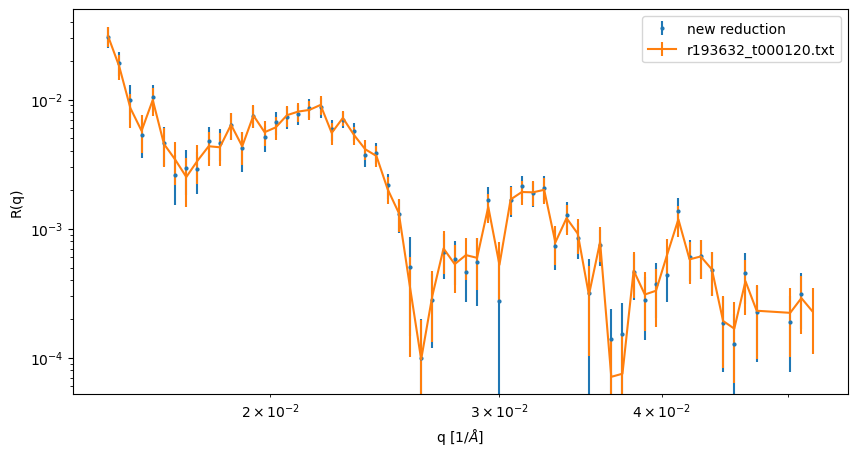

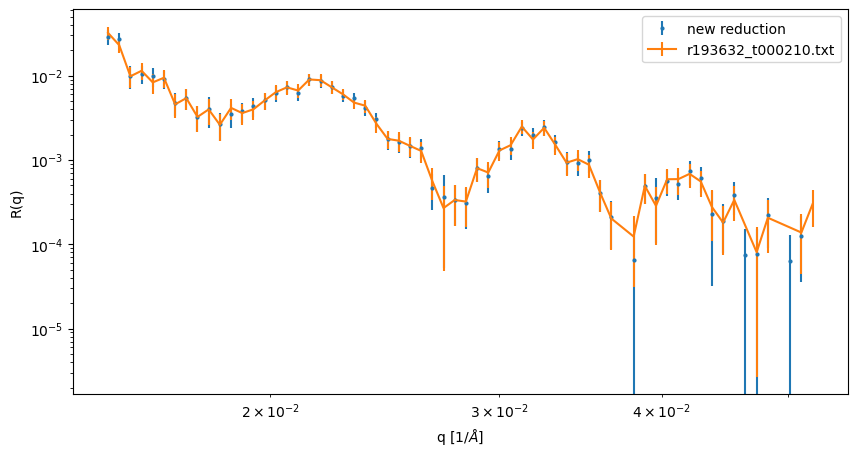

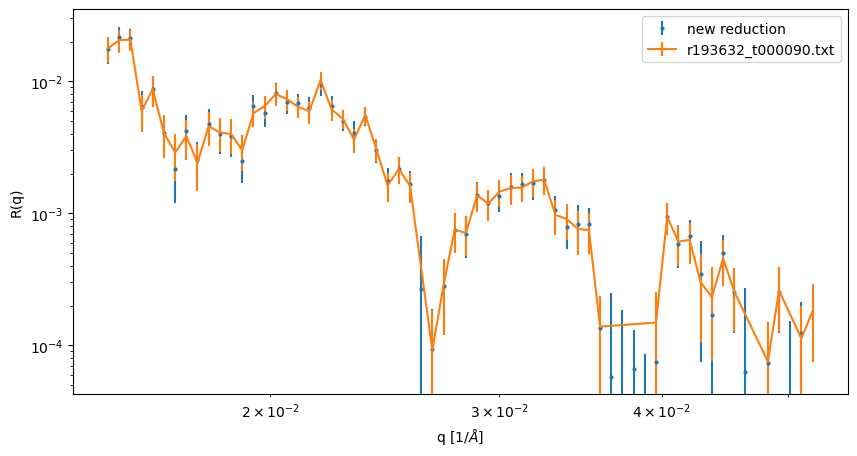

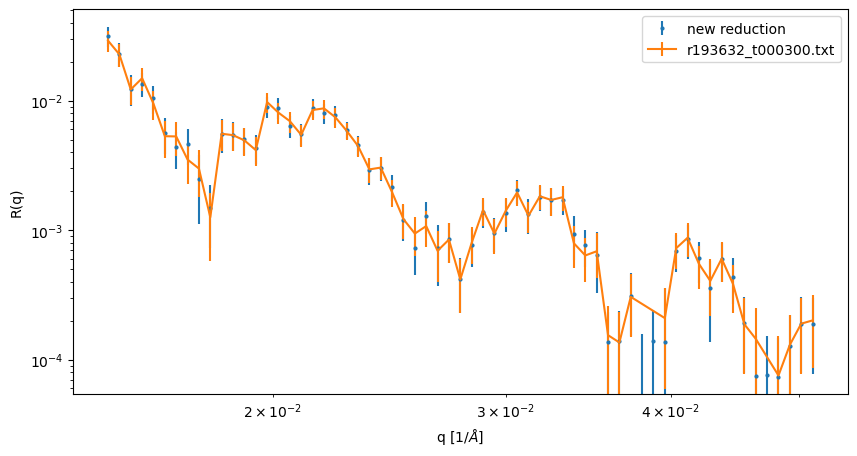

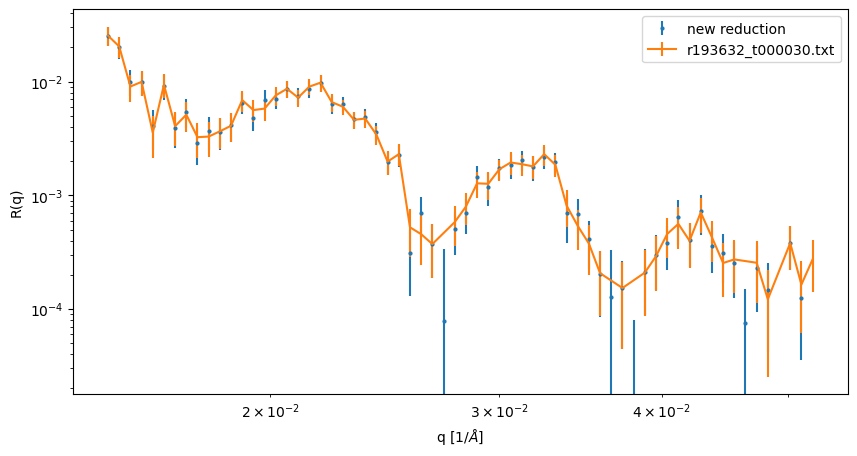

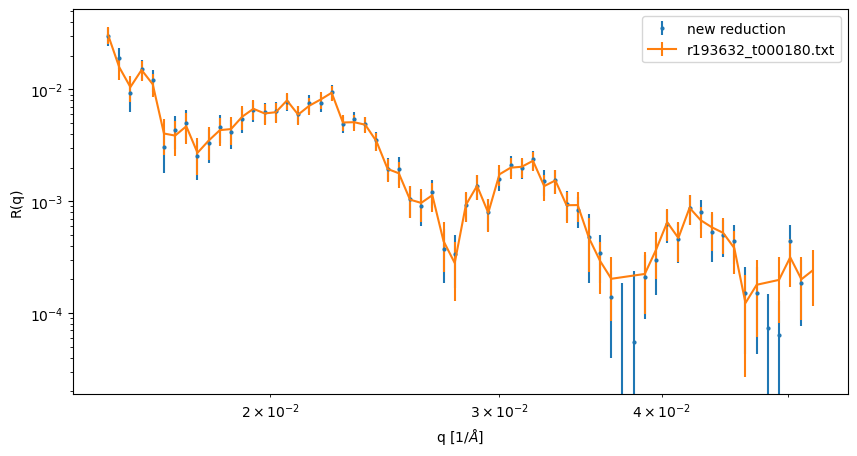

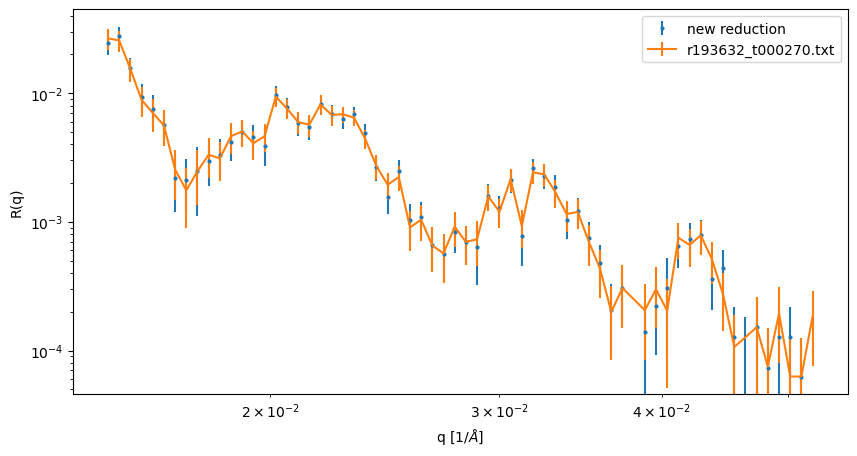

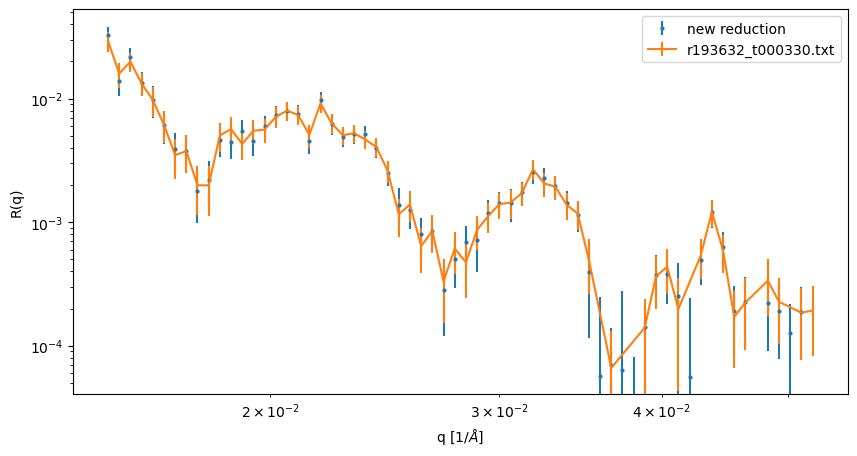

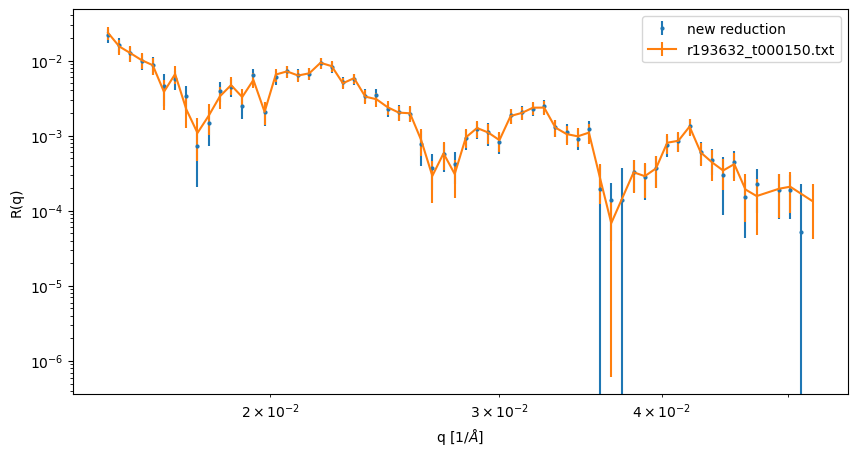

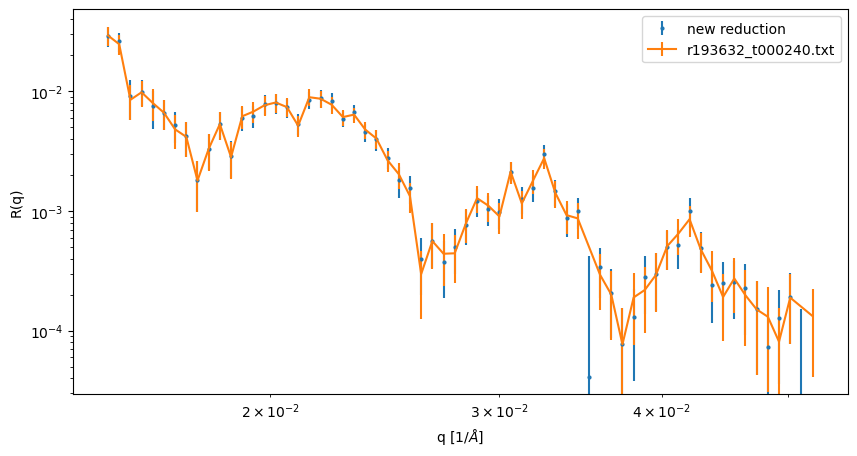

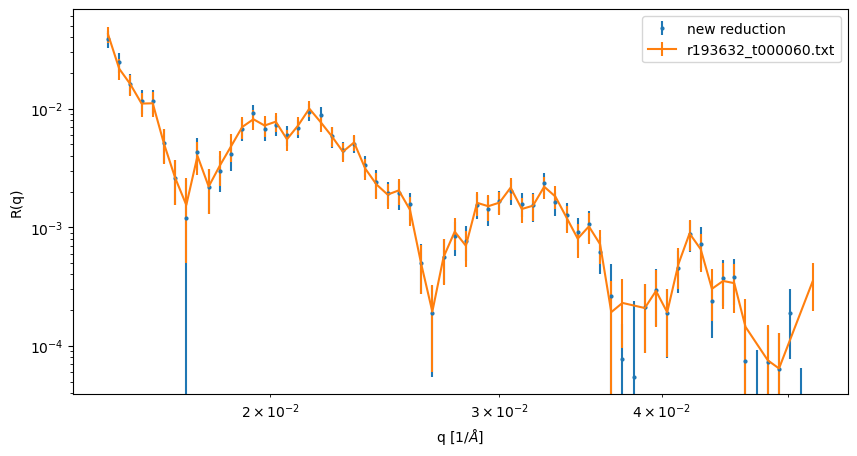

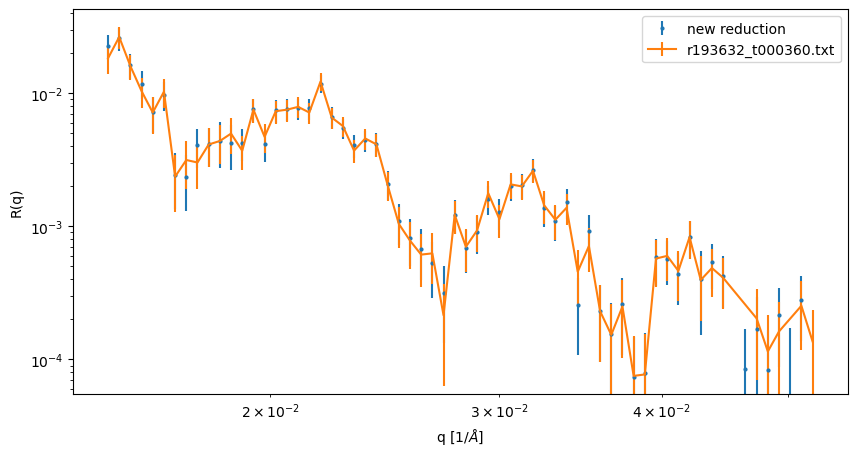

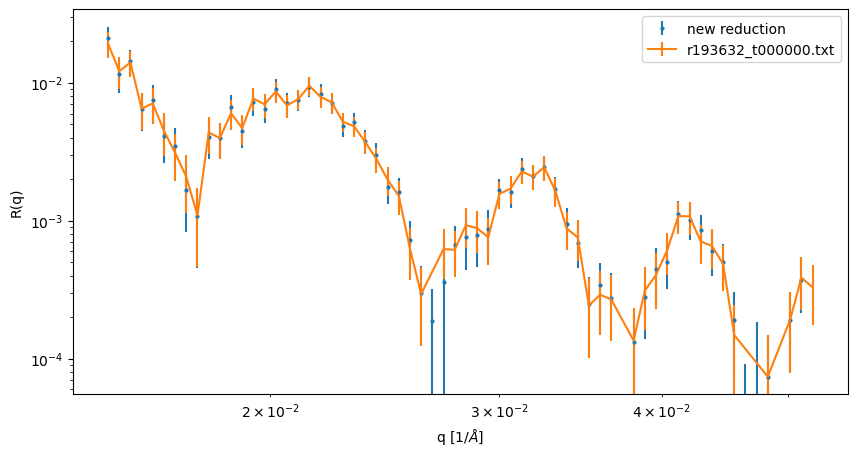

In [25]:
dir_new = '/SNS/users/m2d/tmp2'
dir_old = '/SNS/users/m2d/tmp'

for f in os.listdir(dir_new):
    if f.startswith('r193632') and f.endswith('.txt'):
        data_new = np.loadtxt(os.path.join(dir_new, f)).T
        data_old = np.loadtxt(os.path.join(dir_old, f)).T
        if True:
            fig, ax = plt.subplots(figsize=(10,5))
            plt.errorbar(
                data_new[0], 
                data_new[1], 
                yerr=data_new[2], 
                markersize=4, 
                marker='.', 
                linestyle='', 
                label='new reduction')
            plt.errorbar(data_old[0], data_old[1], yerr=data_old[2], markersize=4, marker='', linestyle='-', label=f)

            plt.legend()
            plt.xlabel('q [$1/\AA$]')
            plt.ylabel('R(q)')
            ax.set_yscale('log')
            ax.set_xscale('log')
            plt.show()

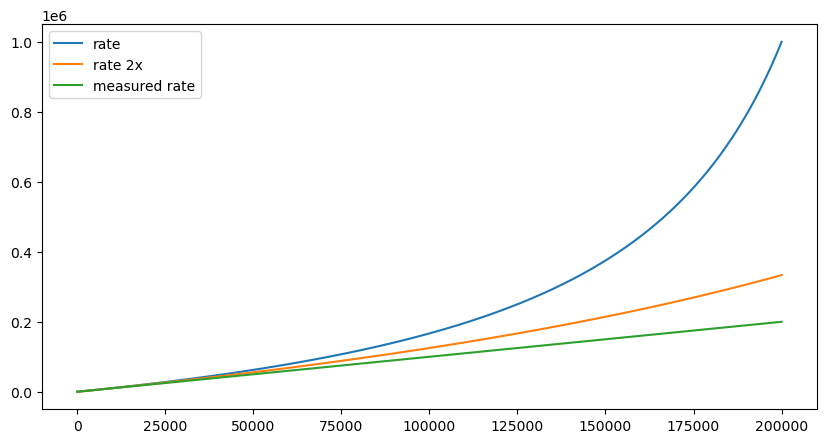

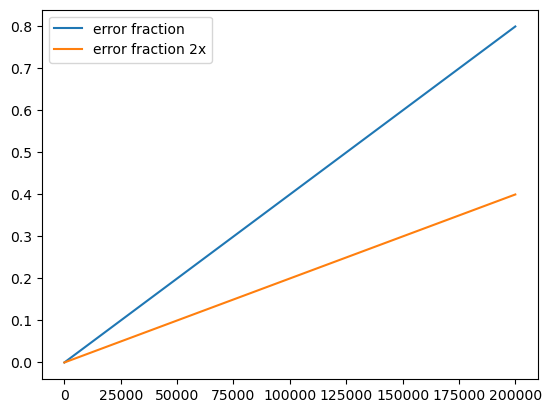

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

deadtime = 4e-6
meastime = 1 # measurement time

counts = np.arange(200000)

rate = counts/(1-counts*deadtime/meastime)
delta_rate = rate-counts

rate2 = counts/(1-counts*0.5*deadtime/meastime)
delta_rate2 = rate2-counts

plt.plot(counts, rate, label='rate')
plt.plot(counts, rate2, label='rate 2x')
plt.plot(counts, counts, label='measured rate')
plt.legend()
plt.show()

plt.plot(counts, delta_rate/rate, label='error fraction')
plt.plot(counts, delta_rate2/rate2, label='error fraction 2x')
plt.legend()
plt.show()
